In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [231]:
bike_df = pd.read_csv('/Users/Shubham.Garg/Documents/python_session/day.csv')

In [232]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [233]:
bike_df.shape

(730, 16)

In [234]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [235]:
#Data Cleaning

In [236]:
bike_df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [237]:
bike_df.drop(['instant'], axis=1, inplace=True)

In [238]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [239]:
bike_df.drop(['dteday'], axis=1, inplace=True)
#dteday is not useful as month and weekday are covering it

In [240]:
bike_df.drop(['casual'], axis=1, inplace=True)
bike_df.drop(['registered'], axis=1, inplace=True)
#Removing casual and registered as cnt is sum of these

In [241]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [242]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [243]:
# Handling Outliers

In [244]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

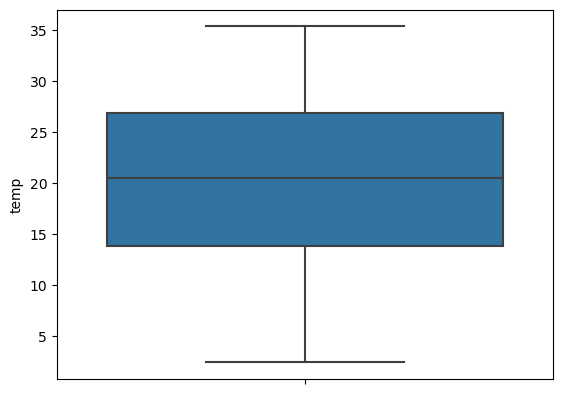

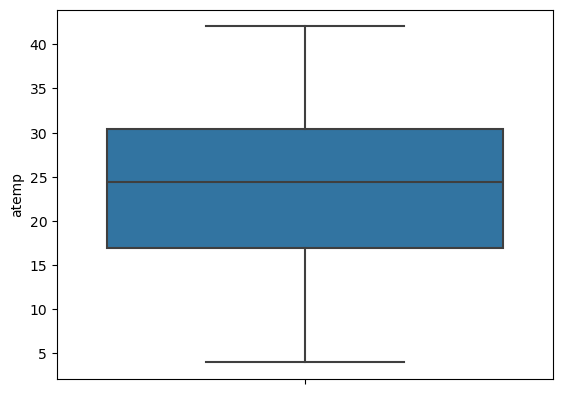

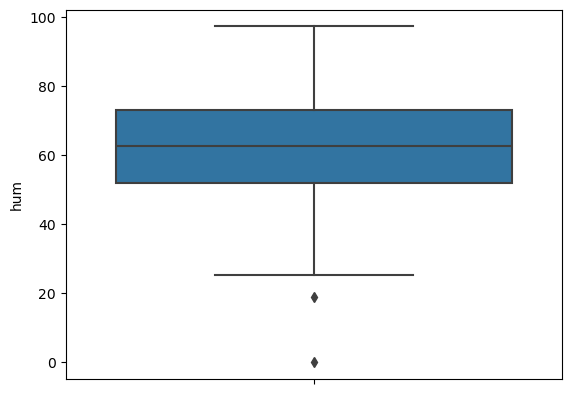

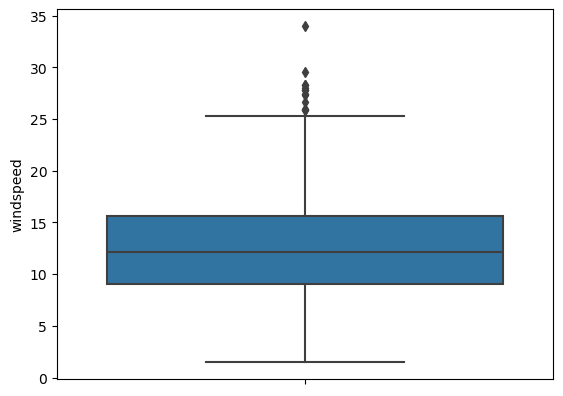

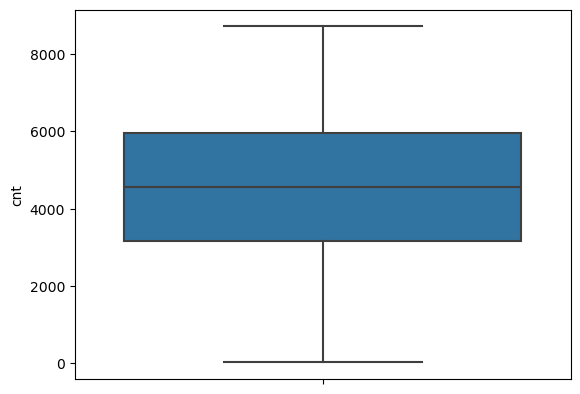

In [245]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for col in num_cols:
    sns.boxplot(y=col, data=bike_df)
    plt.show()

In [246]:
# There are no outliers

In [247]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [248]:
bike_df.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)
bike_df.weathersit.replace({1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'}, inplace=True)

In [249]:
bike_df.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'},
                     inplace=True)
bike_df.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)

In [250]:
bike_df[bike_df['weathersit']=='bad']

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
25,spring,0,jan,0,wed,1,bad,8.917500,10.18000,86.2500,19.687950,506
68,spring,0,mar,0,thu,1,bad,15.952731,19.28340,0.0000,17.545759,623
89,summer,0,mar,0,thu,1,bad,11.001653,12.87875,91.8333,14.582282,1685
105,summer,0,apr,0,sat,0,bad,17.664153,21.27460,88.8333,22.834136,795
248,fall,0,sep,0,tue,1,bad,22.140000,25.76000,88.6957,23.044181,2710
249,fall,0,sep,0,wed,1,bad,24.565847,27.21145,91.7083,6.500394,1996
250,fall,0,sep,0,thu,1,bad,25.990433,27.76805,93.9565,12.914116,1842
284,winter,0,oct,0,wed,1,bad,22.276653,25.88585,90.6250,16.626050,2416
291,winter,0,oct,0,wed,1,bad,22.211299,25.69240,89.5217,16.303713,2424
301,winter,0,oct,0,sat,0,bad,10.420847,11.39565,88.2500,23.541857,627


<Figure size 2000x1200 with 0 Axes>

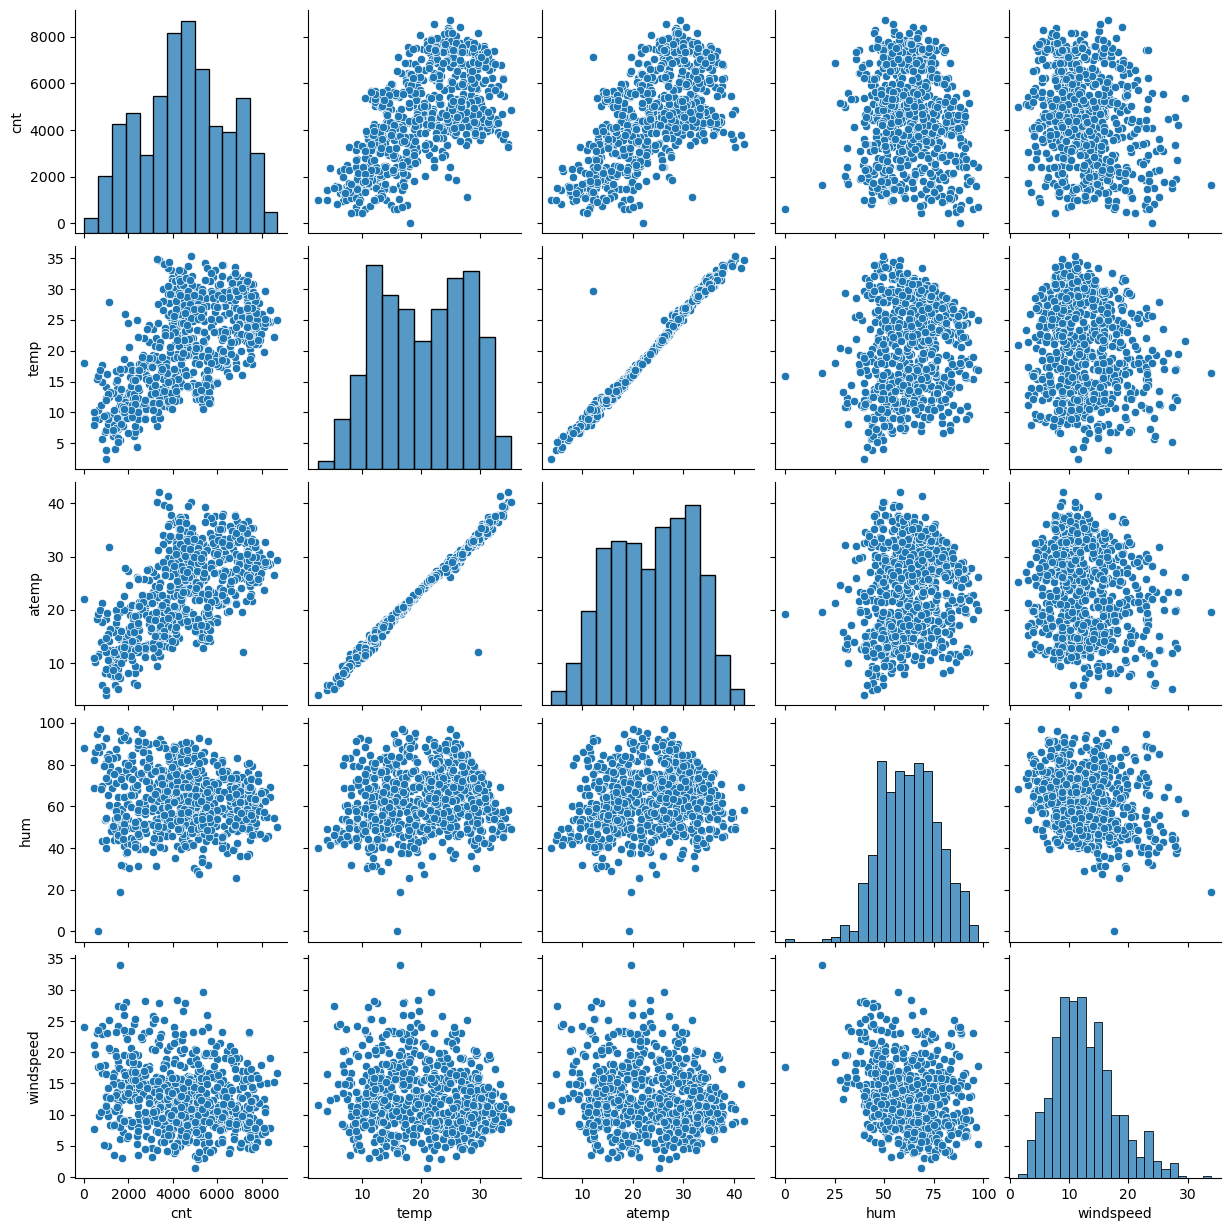

In [251]:
plt.figure(figsize=(20, 12))
sns.pairplot(data=bike_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

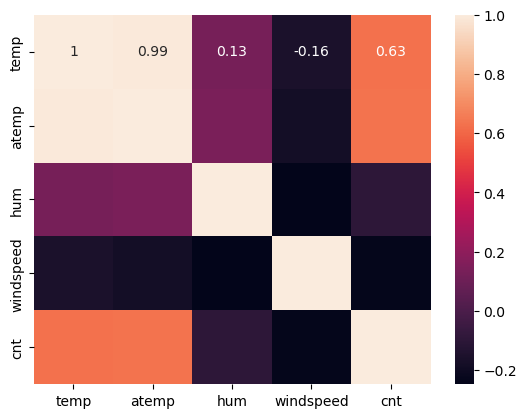

In [179]:
sns.heatmap(bike_df[num_cols].corr(), annot=True)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

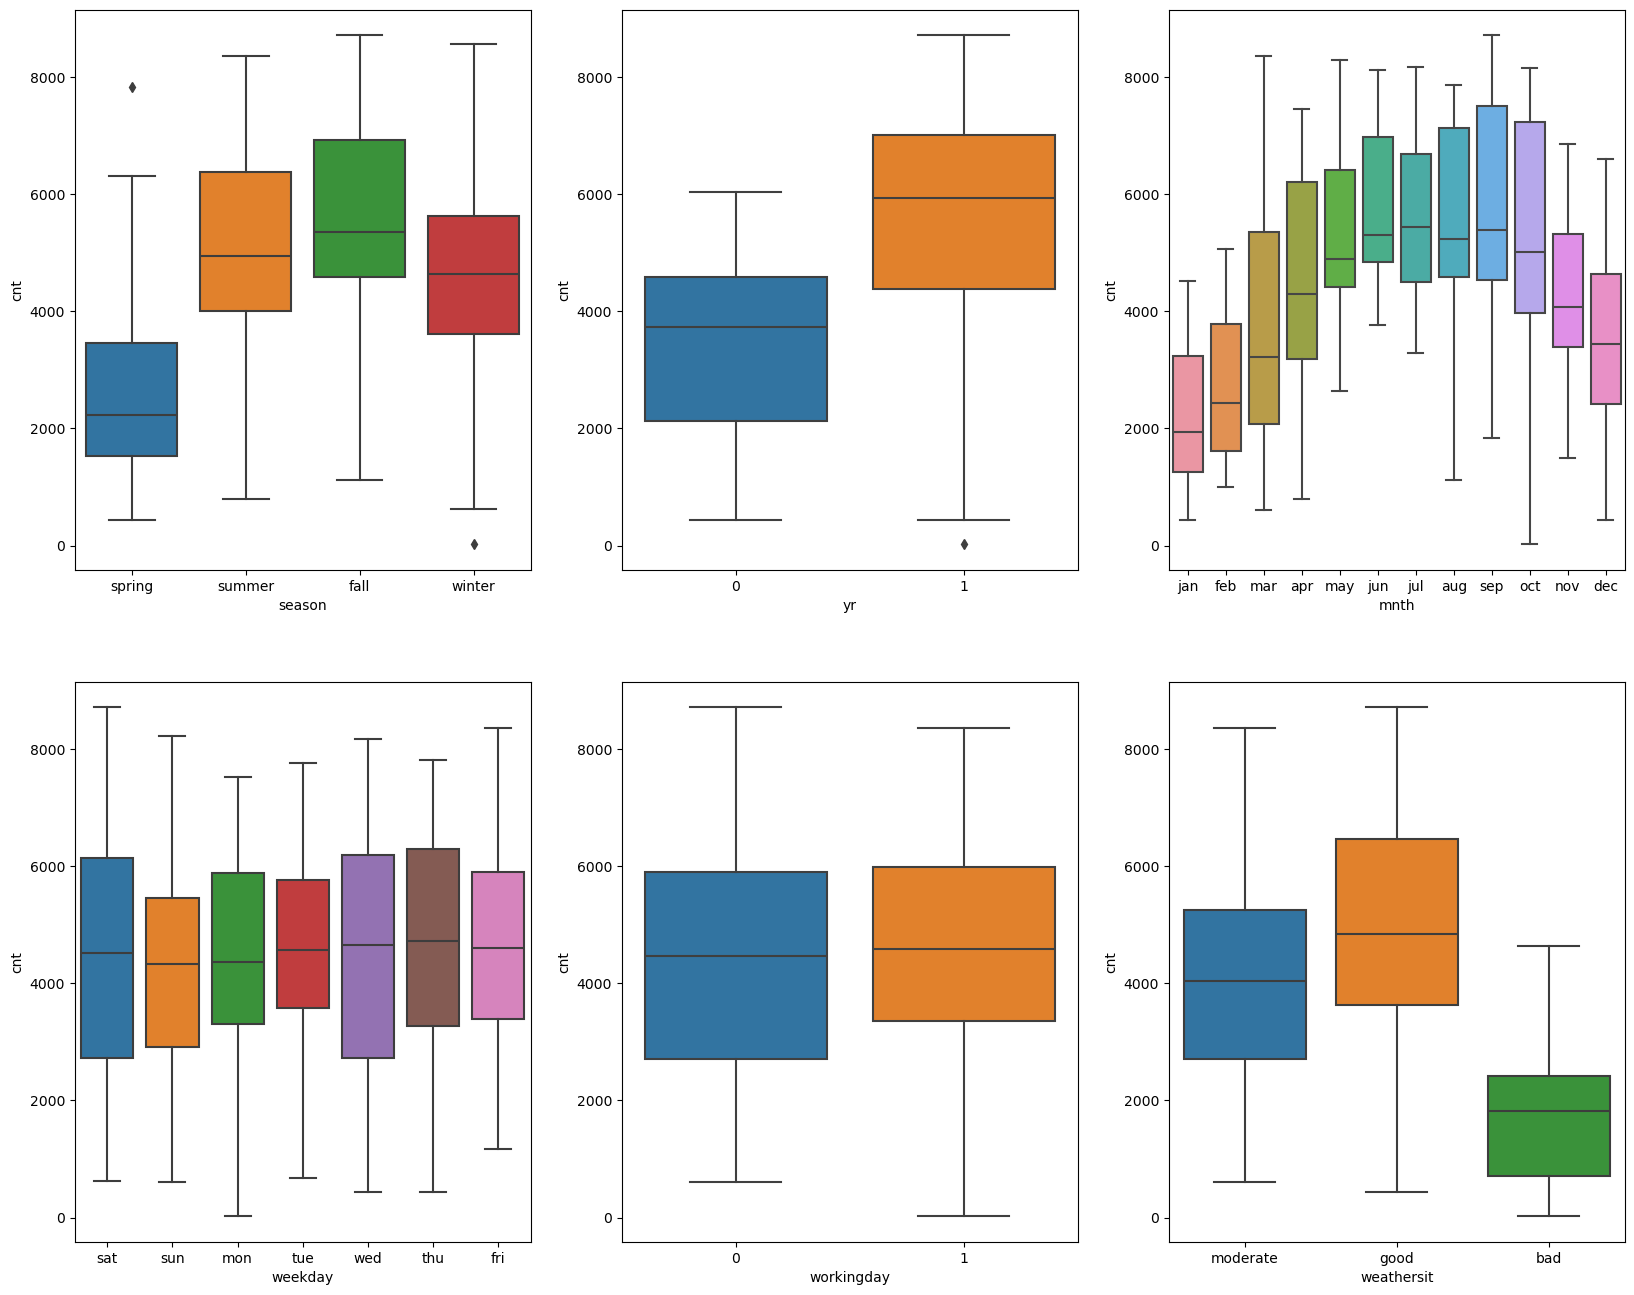

In [180]:
plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

In [181]:
bike_df[bike_df['weathersit']=='bad']

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
25,spring,0,jan,0,wed,1,bad,8.917500,10.18000,86.2500,19.687950,506
68,spring,0,mar,0,thu,1,bad,15.952731,19.28340,0.0000,17.545759,623
89,summer,0,mar,0,thu,1,bad,11.001653,12.87875,91.8333,14.582282,1685
105,summer,0,apr,0,sat,0,bad,17.664153,21.27460,88.8333,22.834136,795
248,fall,0,sep,0,tue,1,bad,22.140000,25.76000,88.6957,23.044181,2710
249,fall,0,sep,0,wed,1,bad,24.565847,27.21145,91.7083,6.500394,1996
250,fall,0,sep,0,thu,1,bad,25.990433,27.76805,93.9565,12.914116,1842
284,winter,0,oct,0,wed,1,bad,22.276653,25.88585,90.6250,16.626050,2416
291,winter,0,oct,0,wed,1,bad,22.211299,25.69240,89.5217,16.303713,2424
301,winter,0,oct,0,sat,0,bad,10.420847,11.39565,88.2500,23.541857,627


In [182]:
## Data preparation for linear regresion

In [183]:
bike_df = pd.get_dummies(data=bike_df, columns=['season', 'mnth', 'weekday'], drop_first=True, dtype=int)
bike_df = pd.get_dummies(data=bike_df, columns=['weathersit'], drop_first=True, dtype=int)

In [184]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [185]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [186]:
bike_df.shape

(730, 30)

In [187]:
y = bike_df.pop('cnt')
x=bike_df

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [189]:
print(x_train.shape)
print(x_test.shape)

(510, 29)
(219, 29)


In [190]:
num_vars = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [191]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [192]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [193]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [194]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [195]:
def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm)
    lr_model = lm.fit()
    print(lr_model.summary())
    return lr_model

In [196]:
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [197]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [198]:
x_train_rfe = x_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate']]

In [199]:
x_train_rfe.shape

(510, 15)

In [200]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate']

In [201]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.13e-191
Time:                        09:03:26   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.5471    

In [202]:
# Dropping column workingday as it has high VIF
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          7.51e-190
Time:                        09:03:26   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 371.2806    

In [203]:
# Dropping column hum
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          5.73e-189
Time:                        09:03:27   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1132.0864    

In [204]:
# dropping holiday as it has high p-value and negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          3.28e-189
Time:                        09:03:27   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     497   BIC:                             8320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1194.5282    

In [205]:
# dropping weathersit_good as it has high p-value and negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.25e-163
Time:                        09:03:27   Log-Likelihood:                -4182.8
No. Observations:                 510   AIC:                             8390.
Df Residuals:                     498   BIC:                             8440.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1272.5041    

In [206]:
# dropping mnth_jul
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_sep', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.96e-163
Time:                        09:03:27   Log-Likelihood:                -4185.9
No. Observations:                 510   AIC:                             8394.
Df Residuals:                     499   BIC:                             8440.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1191.3582    

In [207]:
# dropping workingday as it has high p-value and negative coefficient
cols = ['yr', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'mnth_sep', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     204.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.61e-161
Time:                        09:03:27   Log-Likelihood:                -4193.2
No. Observations:                 510   AIC:                             8406.
Df Residuals:                     500   BIC:                             8449.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1525.5519    

In [208]:
# dropping windspeed
cols = ['yr', 'temp', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sep', 'weekday_sat',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     209.1
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          2.74e-154
Time:                        09:03:28   Log-Likelihood:                -4213.1
No. Observations:                 510   AIC:                             8444.
Df Residuals:                     501   BIC:                             8482.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 994.6677    

In [209]:
# dropping weekday_sat
cols = ['yr', 'temp', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sep', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     238.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          3.77e-155
Time:                        09:03:28   Log-Likelihood:                -4213.9
No. Observations:                 510   AIC:                             8444.
Df Residuals:                     502   BIC:                             8478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1025.5688    

In [210]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [213]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(x_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1025.5687587047355 [2078.08270744 4398.90914403 -526.19882674  461.98169028  741.33577756
  726.94195687 -542.74132869]


In [215]:
y_train_pred = lr.predict(x_train[cols])

In [217]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

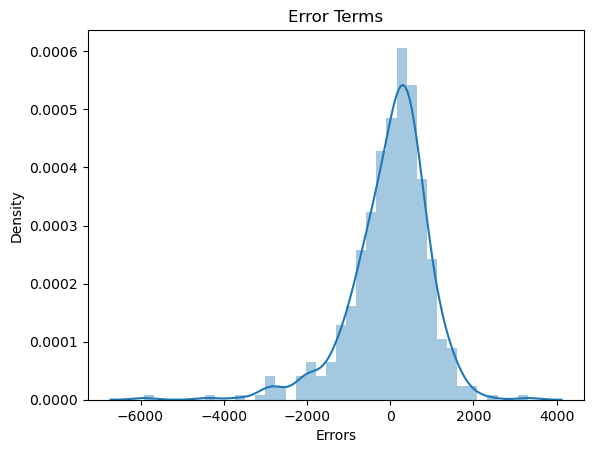

In [218]:
plot_res_dist(y_train, y_train_pred)

In [221]:
r2_score(y_train,y_train_pred)

0.7687693934702674

In [222]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

x_test[num_vars] = scaler.transform(x_test[num_vars])

In [223]:
cols = ['yr', 'temp', 'season_spring', 'season_summer', 'season_winter',
       'mnth_sep', 'weathersit_moderate']
y_test_pred = lr.predict(x_test[cols])

In [224]:
r2_score(y_test,y_test_pred)

0.7741444927767211

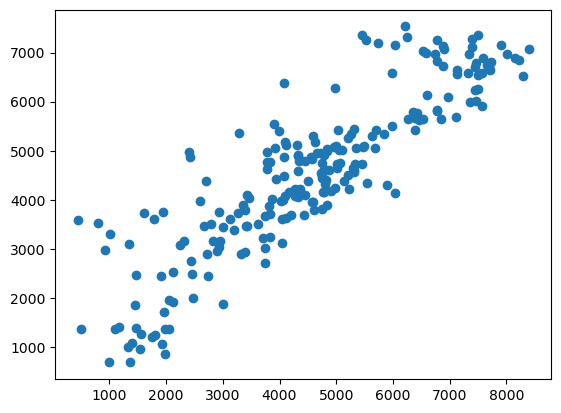

In [226]:
plt.scatter(y_test, y_test_pred)

In [227]:
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     238.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          3.77e-155
Time:                        08:12:20   Log-Likelihood:                -4213.9
No. Observations:                 510   AIC:                             8444.
Df Residuals:                     502   BIC:                             8478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1025.5688    